# Explanatory Data Analysis for Absolute Beginners

This kaggle kernel covers Explanatory Data Analysis (EDA) for one of the most famous data set, Auto-MPG.

For a newbie data scientist, I believe this kernel will be illuminative and again for those who starts writing in Python can make use of this kernel. 

Let's start with importing some packages and the data set;

In [1]:
# Import Packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data 
Auto = pd.read_csv("../input/autompg-dataset/auto-mpg.csv")

## First Impressions are Important !! 

To understand the characteristics of the data set or to get a first 'impression', printing a small part of the data is always suggested. Here we can use _head()_ function to print the first 5 observations of the data set by default. However, if you would like to see more or less than 5 observations, you can specify the number of observations you want to see.

In [2]:
Auto.head() # by default will print 5 obs. 
# Auto.head(10) # will print first 10 obs. 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Like _head()_ function we have also _tail()_ function which returns the last 5 observations in the data frame by default. Again, you can specify the number of observations you would like to see.

In [3]:
Auto.tail() # by default will print last 5 obs. 
# Auto.tail(7) # will print last 7 obs.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


Sometimes you may forget or misspell the names of variables you have in your data frame. For those times, using _head()_ command to see those variable names may not be a good idea. Instead you can use _columns_ functions to see the variable names in your data frame.

In [4]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

One of the most important thing to have a look at is the dimension of the data frame. You can use _shape_ function to see the number of rows (observations) and columns (variables, features) you have in your data frame. The function will return to a tuple where you will see first the number of rows and second the number of columns you have in the data frame.

In [5]:
Auto.shape

(398, 9)

Also, there is another function that provides strong information about the types of the variables (or features). The _info()_ function provides some sort of a table including the name of the variables, how many nonmissing values in each variables and data types of those variable. Also, it provides the dimentions of tha data frame.  

In [6]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Data Manipulation

Sometimes the data that we have is not the data we need or can use directly. For example, we may have some missing values, or different type of alphabets, unmatching date types, etc. Those can be considered minor problems but solutions may be difficult. 

Now, we are able to see that 'horsepower' variable is stored as an object, now we have to be a little bit suspicious about something. The variable is most likely to have some non-numeric items.

Let's have a look at all the values stored in 'horsepower' variable.


In [7]:
for i in list(Auto['horsepower']):
    print(i, end=', ')

130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150, 225, 95, 95, 97, 85, 88, 46, 87, 90, 95, 113, 90, 215, 200, 210, 193, 88, 90, 95, ?, 100, 105, 100, 88, 100, 165, 175, 153, 150, 180, 170, 175, 110, 72, 100, 88, 86, 90, 70, 76, 65, 69, 60, 70, 95, 80, 54, 90, 86, 165, 175, 150, 153, 150, 208, 155, 160, 190, 97, 150, 130, 140, 150, 112, 76, 87, 69, 86, 92, 97, 80, 88, 175, 150, 145, 137, 150, 198, 150, 158, 150, 215, 225, 175, 105, 100, 100, 88, 95, 46, 150, 167, 170, 180, 100, 88, 72, 94, 90, 85, 107, 90, 145, 230, 49, 75, 91, 112, 150, 110, 122, 180, 95, ?, 100, 100, 67, 80, 65, 75, 100, 110, 105, 140, 150, 150, 140, 150, 83, 67, 78, 52, 61, 75, 75, 75, 97, 93, 67, 95, 105, 72, 72, 170, 145, 150, 148, 110, 105, 110, 95, 110, 110, 129, 75, 83, 100, 78, 96, 71, 97, 97, 70, 90, 95, 88, 98, 115, 53, 86, 81, 92, 79, 83, 140, 150, 120, 152, 100, 105, 81, 90, 52, 60, 70, 53, 100, 78, 110, 95, 71, 70, 75, 72, 102, 150, 88, 108, 120, 180, 145, 130, 150, 68, 80, 58, 96, 70, 145, 

There are some question marks 'horsepower' variable. This could be considered some sort of a missing value issue. 

To convert 'horsepower' variable to numeric, we have to get rid of question marks, '?', in the variable. We can delete those rows or we can impute values where '?' are located. 

Let's make a median imputation for those '?', then convert 'horsepower' to integers.

In [8]:
median_horsepower = Auto["horsepower"][Auto["horsepower"]!="?"].median()
Auto["horsepower"] = Auto["horsepower"].replace('?', median_horsepower).astype(int)

We have 'cylinders' variable which represents the number of cylinders of those cars'. Althought it looks like 'cylinders' variable is a numeric variable, in fact it has to be treated like a __'categorical'__ variable. 

Let's convert it to a __'categorical'__ variable.

In [9]:
Auto["cylinders"] = pd.Series(Auto["cylinders"], dtype = "category")

Also, assume that we know the fact that 'origin' represents where those cars from, and it has to be considered as a __'categorical'__ variable with 3 levels, 

1 = American,

2 = European,

3 = Japanese.

So, let's convert 1's with 'American', 2's with 'European' and 3's with 'Japanese'. Then save it as a __'categorical'__ variable.

In [10]:
Auto.loc[Auto['origin'] == 1, 'origin'] = "American"
Auto.loc[Auto['origin'] == 2, 'origin'] = "European"
Auto.loc[Auto['origin'] == 3, 'origin'] = "Japanese"

Auto["origin"] = pd.Series(Auto["origin"], dtype = "category")

Moreover, let's assume we are not going to use 'model year' and car name variables and we want to remove them from the data frame. 

In [11]:
Auto = Auto.drop(columns=["model year", "car name"])

Let's see the final version of the data frame. 

In [12]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,American
1,15.0,8,350.0,165,3693,11.5,American
2,18.0,8,318.0,150,3436,11.0,American
3,16.0,8,304.0,150,3433,12.0,American
4,17.0,8,302.0,140,3449,10.5,American


## More on Impressions

We have seen what we firstly had to see, now it is time to have some numerical impressions. 

Personally, I prefer to see the summary statistics of the data set. 

Quick question: What does summary statistics mean ??? 

Summary statistics provide statistical information about your data set. Mean, standard deviation, range, minimum-maximum points, etc. are summarize your data, give statistical insight of your data. 

In python, to see summary statistics easily for each one of the variables you have, all you need to use _describe_ function. This function can provide; count, mean, standard deviation, minimum value, maximum value, and quantiles of each _numeric_ variable.

In [13]:
Auto.describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.296482,2970.424623,15.568090
std,7.815984,104.269838,38.224809,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,93.000000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


After seeing summary statistics for each variables seperately, the correlations of the variables is what we may wish to see before going into detail. To achieve a correlation matrix, all you need to use _corr()_ function. This function will return a matrix where you can see correlation values between 2 variables. 

In [14]:
Auto.corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804203,-0.773522,-0.831741,0.420289
displacement,-0.804203,1.000000,0.895849,0.932824,-0.543684
horsepower,-0.773522,0.895849,1.000000,0.862502,-0.686676
weight,-0.831741,0.932824,0.862502,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.686676,-0.417457,1.000000


## Sub-sampling & Filtering

Sometimes data sets can be too big to handle, and sometimes not all the information in the data is required for a specific task. Instead of digging the whole data set for a specific task you can creates sub-samples from that 'big' data with some basic queries. 

Now, first create a sub-sample from Auto data set, consisting only European cars. 

In [15]:
Auto_European = Auto[Auto["origin"] == "European"]
Auto_European.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
19,26.0,4,97.0,46,1835,20.5,European
20,25.0,4,110.0,87,2672,17.5,European
21,24.0,4,107.0,90,2430,14.5,European
22,25.0,4,104.0,95,2375,17.5,European
23,26.0,4,121.0,113,2234,12.5,European


Now, lets filter down by horsepower. Assume that you are only interested in cars more than 110 HP. 

In [16]:
Auto_Power = Auto[Auto["horsepower"] > 110]
Auto_Power.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,American
1,15.0,8,350.0,165,3693,11.5,American
2,18.0,8,318.0,150,3436,11.0,American
3,16.0,8,304.0,150,3433,12.0,American
4,17.0,8,302.0,140,3449,10.5,American


Now, add another condition, 

Create another sub-sample of cars satisfying following conditions HP > 100 and mpg > 20

In [17]:
Auto_Power_Mpg = Auto[(Auto["horsepower"] > 110) & (Auto["mpg"] > 20)]
Auto_Power_Mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
23,26.0,4,121.0,113,2234,12.5,European
180,25.0,4,121.0,115,2671,13.5,European
251,20.2,8,302.0,139,3570,12.8,American
276,21.6,4,121.0,115,2795,15.7,European
280,21.5,6,231.0,115,3245,15.4,American


Now, store only mpg, cylinders, horsepower variables in a new subset.

In [18]:
new_subset = Auto[{"mpg","cylinders","horsepower"}]
new_subset.head()

,mpg,horsepower,cylinders
0,18.0,130,8
1,15.0,165,8
2,18.0,150,8
3,16.0,150,8
4,17.0,140,8


## Creating Visuals

We have seen that numbers can be very informative however, having 'a lot' of numbers may be confusing or even boring for most of the people. Rather than 'playing' with numbers too much, we can get some help from cool visuals that gives strong information of the whole data set or just of a single variable. 

### Correlation Plot (Heat Map)

Let's recall that we created a correlation matrix earlier to see the correalation values between numeric variables. Now, we can create a 'plot' that show again correalation values between numeric variables in our data set.

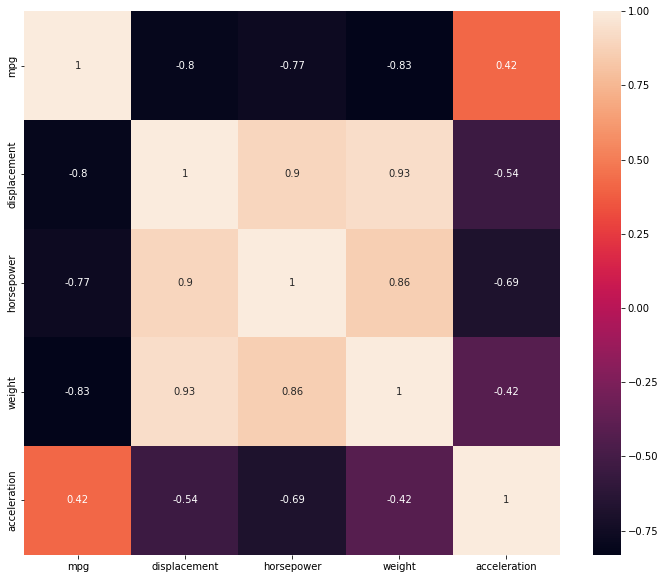

In [19]:
plt.figure(figsize=(12,10))
cor = Auto.corr()
sns.heatmap(cor, annot=True)
plt.show()

### Scatter Plot

From the Correlation Plot above, we are able to see that there is a strong negative relationship between weight and mpg. That means, the more the car weighs, the more gas it consumes. 

Let's obtain a scatter plot to see the relationship between weight and mpg.

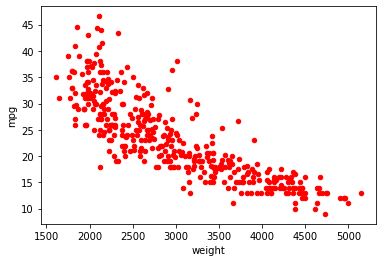

In [20]:
Auto.plot(kind = "scatter", x = "weight", y = "mpg", color = "Red")
plt.show()

This scatter plot confirms that there is a strong negative relationship between weight and mpg.

You can add another layer, or 3rd dimension by coloring the points in the scatter plot. Let's now assume that you want to add origin factor to the previous scatter plot. 

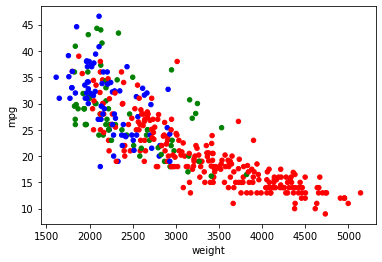

In [21]:
colors = {'American':'Red', 'European':'Green', 'Japanese':'Blue'}
Auto.plot(kind = "scatter", x = "weight", y = "mpg", 
          color = Auto['origin'].map(colors))
plt.show()

### Histogram

Histograms are used to see the distribution numerical data. Here let's create a primitive example for mpg variable. Default version divides the data to 10 bins. 

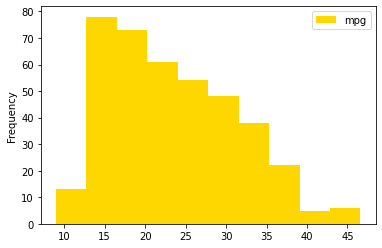

In [22]:
Auto.plot(kind = "hist", y = "mpg", color = "Gold")
plt.show()

However, sometimes increasing or decreasing the number of bins in a histogram may provide valuable information. There is a 'bins' option inside the function. Now let's increase the number of bins to 25.

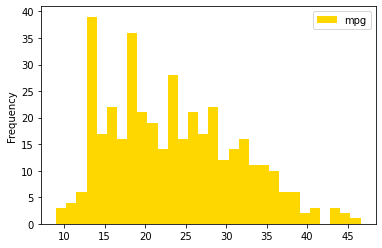

In [23]:
Auto.plot(kind = "hist", y = "mpg",bins = 30, color = "Gold")
plt.show()

### Box Plot

Boxplots provide information about the concentration, shape, distribution, range of a continuous variable. Let's obtain a boxplot for Horsepower in Auto data set.

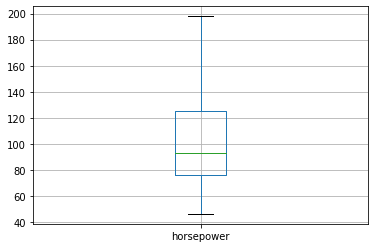

In [24]:
Auto.boxplot(column = "horsepower",showfliers=False)
plt.show()

You can also create boxplots for grouped data. Here in the next plot you will see there is 3 boxplots for mpg variable for different origins. In other words, it illustrates the distributions of mpg variable by origin.

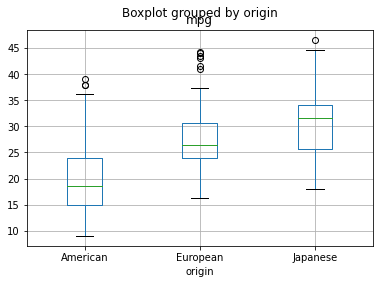

In [25]:
Auto.boxplot(column = "mpg", by = "origin")
plt.show()

## Bar Plot

Bar plots are used to visualize the count or the percentage of certain variable. 

Let's now obtain a basic bar plot for origin variable.  

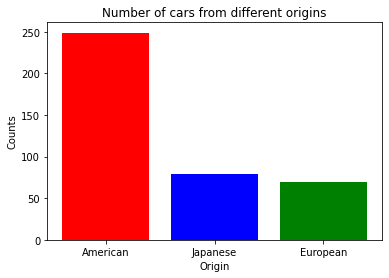

In [26]:
plt.bar(pd.unique(Auto["origin"]),
        Auto["origin"].value_counts(),
        color = ["Red","Blue","Green"])
plt.xlabel("Origin")
plt.ylabel("Counts")
plt.title("Number of cars from different origins")
plt.show()